<img src="https://raw.githubusercontent.com/FUlyankin/Parsers/master/images%20/cian_main_theme.png" height="1000" width="1000"> 

<img align="center" src="https://www.cian.ru/promo/adv/assets/images/logo.svg" height="300" width="300"> 


# <center> Грабёж, разбой и другие незаконные деяния с помощью Python. <br> <br>  Варка Фич.   </center>
---------


<img src="https://raw.githubusercontent.com/FUlyankin/Parsers/master/images%20/proud_cat_orange.jpg" height="500" width="500"> 


## 1. Варим фичи и смотрим картинки

Самые необходимые пакеты. `numpy` – быстрые вычесления (написан на C и Fortrn), `pandas` – как R-овские DataFrame и data.table, `matplotlib` – очень гибкая штука для графиков.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # Стиль графиков прямо как в R! 
# Активация этой опции позволяет видеть все столбцы у датафреймов
pd.set_option('display.max_columns', None)
# Отображать 100 строк датафрейма
pd.set_option('display.max_rows', 100)
# Опция для отображения двуз знаков после запятой, а не шести
pd.set_option('precision', 2)
# Опция для отображения картинок
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('clean_data_for_work.csv', header=0, sep=',' ,index_col=0)
df.head()

,Total_floor,Curent_floor,Price,TotalSq,LiveSq,KichSq,new_or_not,house_type,pass_elevator,gruz_elevator,balkon,lodgya,visokiy_potolok,sovmest_sanuz,razdeln_sanuz,exist_sanuz,do_metro_peshkom,do_metro_mashina,past_year,future_year,latitude,longitude,sell_type,phone,status_doma,repair,parking,view_window,otdelka,metro_name,rooms,hrefs
0,6,2,6.60e+06,52.4,30.8,12.9,вторичка,кирпично-монолитный,2,1,0,0,NaN,NaN,1.0,NaN,NaN,7.0,NaN,NaN,55.86,37.54,свободная,нет,NaN,NaN,NaN,улица,NaN,"Петровско-Разумовская,",2-комн. кв.,https://www.cian.ru/sale/flat/156522396/
1,12,1,9.70e+06,47.0,35.0,9.0,вторичка,блочный,1,1,0,0,2.7,NaN,2.0,NaN,11.0,NaN,1965.0,NaN,55.79,37.64,свободная,NaN,NaN,отсутствует,NaN,улица,NaN,"Проспект Мира,",2-комн. кв.,https://www.cian.ru/sale/flat/152531280/
2,25,18,1.75e+07,97.0,60.0,11.0,вторичка,NaN,2,2,0,2,NaN,NaN,2.0,NaN,15.0,NaN,NaN,NaN,55.79,37.48,свободная,NaN,NaN,отсутствует,наземная,двор и улица,NaN,"Октябрьское поле,",3-комн. кв.,https://www.cian.ru/sale/flat/154680416/
3,3,3,1.29e+06,15.3,NaN,NaN,вторичка,NaN,0,0,0,0,NaN,NaN,NaN,нет,NaN,15.0,2014.0,NaN,55.49,37.55,свободная,NaN,NaN,косметический,NaN,NaN,NaN,"Бунинская аллея,",студия,https://www.cian.ru/sale/flat/156788999/
4,3,3,1.44e+06,29.0,26.0,NaN,вторичка,NaN,0,0,0,0,NaN,1.0,NaN,NaN,NaN,25.0,NaN,NaN,55.65,37.32,свободная,NaN,NaN,отсутствует,наземная,NaN,NaN,"Киевская,",студия,https://www.cian.ru/sale/flat/153866608/


In [3]:
df.shape

(60000, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Data columns (total 32 columns):
Total_floor         60000 non-null int64
Curent_floor        60000 non-null int64
Price               60000 non-null float64
TotalSq             60000 non-null float64
LiveSq              50706 non-null float64
KichSq              39385 non-null float64
new_or_not          60000 non-null object
house_type          33964 non-null object
pass_elevator       60000 non-null int64
gruz_elevator       60000 non-null int64
balkon              60000 non-null int64
lodgya              60000 non-null int64
visokiy_potolok     23442 non-null float64
sovmest_sanuz       38000 non-null float64
razdeln_sanuz       10990 non-null float64
exist_sanuz         11419 non-null object
do_metro_peshkom    17651 non-null float64
do_metro_mashina    26923 non-null float64
past_year           25990 non-null float64
future_year         18680 non-null object
latitude            60000 non-null float64
long

In [5]:
# Основная статистика о числовой части датафрейма: 
df.describe()

,Total_floor,Curent_floor,Price,TotalSq,LiveSq,KichSq,pass_elevator,gruz_elevator,balkon,lodgya,visokiy_potolok,sovmest_sanuz,razdeln_sanuz,do_metro_peshkom,do_metro_mashina,past_year,latitude,longitude
count,60000.00,60000.00,6.00e+04,60000.00,50706.00,39385.00,60000.00,60000.00,60000.00,60000.00,23442.00,38000.00,10990.00,17651.00,26923.00,25990.00,60000.00,60000.00
mean,9.29,2.68,2.51e+13,33.91,21.97,8.12,0.55,0.47,0.18,0.12,2.86,1.06,1.05,12.63,26.66,1999.79,55.60,37.36
std,8.07,3.85,3.55e+14,32.96,21.49,4.83,0.91,0.54,0.40,0.36,3.77,0.30,0.24,7.71,9.49,36.49,0.12,0.28
min,1.00,1.00,1.29e+06,11.40,1.00,1.00,0.00,0.00,0.00,0.00,0.02,1.00,1.00,1.00,2.00,0.00,55.32,36.86
25%,3.00,1.00,1.80e+06,17.50,13.00,3.00,0.00,0.00,0.00,0.00,2.64,1.00,1.00,8.00,15.00,1996.00,55.50,37.20
50%,5.00,1.00,1.99e+06,29.00,18.10,10.00,0.00,0.00,0.00,0.00,2.70,1.00,1.00,10.00,30.00,2002.00,55.58,37.47
75%,14.00,3.00,2.20e+06,34.80,22.00,10.80,1.00,1.00,0.00,0.00,3.00,1.00,1.00,16.00,35.00,2014.00,55.65,37.55
max,97.00,75.00,1.75e+16,613.00,490.00,80.00,94.00,11.00,4.00,4.00,300.00,4.00,4.00,99.00,60.00,2017.00,56.01,37.94


In [6]:
# Описательная статистика для нечисловых данных:
df.describe(include=['object', 'bool'])

,new_or_not,house_type,exist_sanuz,future_year,sell_type,phone,status_doma,repair,parking,view_window,otdelka,metro_name,rooms,hrefs
count,60000,33964,11419,18680,59885,11481,336,40164,27679,46498,128,49112,60000,60000
unique,2,6,3,11,6,2,2,4,5,3,1,195,8,4114
top,вторичка,монолитный,нет,['2017'],свободная,нет,апартаменты,отсутствует,наземная,двор,есть,"Саларьево,",1-комн. кв.,https://www.cian.ru/sale/flat/155634565/
freq,41320,16777,11398,8931,52548,7746,216,24358,24186,34726,128,10752,35726,2114


In [7]:
# Очень важная характеристика датасета - количество NA 
df.isnull().sum()

Total_floor             0
Curent_floor            0
Price                   0
TotalSq                 0
LiveSq               9294
KichSq              20615
new_or_not              0
house_type          26036
pass_elevator           0
gruz_elevator           0
balkon                  0
lodgya                  0
visokiy_potolok     36558
sovmest_sanuz       22000
razdeln_sanuz       49010
exist_sanuz         48581
do_metro_peshkom    42349
do_metro_mashina    33077
past_year           34010
future_year         41320
latitude                0
longitude               0
sell_type             115
phone               48519
status_doma         59664
repair              19836
parking             32321
view_window         13502
otdelka             59872
metro_name          10888
rooms                   0
hrefs                   0
dtype: int64

Построим какие-нибудь картинки!

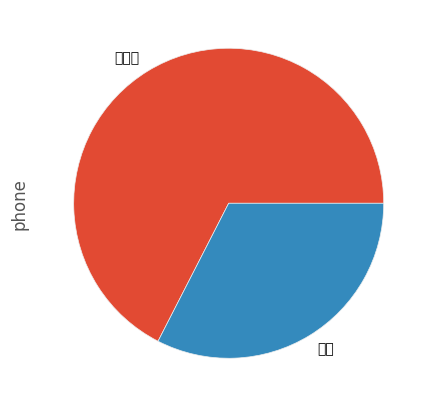

In [8]:
df.phone.value_counts().plot(kind='pie', figsize=(5,5))

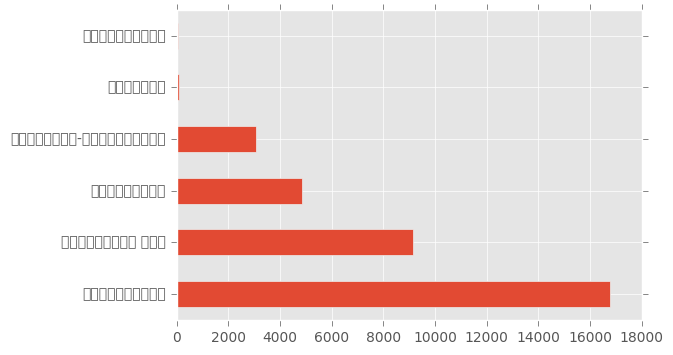

In [9]:
df.house_type.value_counts().plot(kind='barh')

Начинаем варить фичи! Мы будем предсказывать цену квартиры. Что бы такого поставить справа...
У нас уже есть в хорошем виде: 

* Количество этажей 
* На каком этаже квартира
* Общая площадь квартиры
* Жилая площадь квартиры
* Площадь кухни
* Площадь комнат (совпадает с жилой площадь, нет смысла использовать её) 
* Пассажирские лифты
* Грузовые лифты
* Балконы
* Лоджии
* до метро пешком или на машине

Надо бы видоизменить: 

* На вторичном или первичном рынке торгуется квартира (превратить в дамми) 
* Тип дома. Нужно придумать упорядочивание
* Санузлы 
* Координаты квартиры нужно преобразовать в расстояние до центра.
* Тип продажи надо преобразовать в Дамми
* Наличие телефона надо превратить в Дамми 
* Ремонт - в категориальную переменную 
* Парковка - в категориальную переменную 
* Вид из окна - в категориалную переменную или в несколько дамми
* Можно посчитать расстояние до метро, подсоединившись к Google API (сделаем это в другой раз) 
* Сколько лет квартире? 

Имеет ли смысл использовать? 

* Высота потолка (мало квартир предоставили эти данные) 
* Статус дома встречается экстраредко... 
* Отделка встречается экстраредко...


## 1. Варка фич, с которой можно поспорить!

In [10]:
df.head() 

,Total_floor,Curent_floor,Price,TotalSq,LiveSq,KichSq,new_or_not,house_type,pass_elevator,gruz_elevator,balkon,lodgya,visokiy_potolok,sovmest_sanuz,razdeln_sanuz,exist_sanuz,do_metro_peshkom,do_metro_mashina,past_year,future_year,latitude,longitude,sell_type,phone,status_doma,repair,parking,view_window,otdelka,metro_name,rooms,hrefs
0,6,2,6.60e+06,52.4,30.8,12.9,вторичка,кирпично-монолитный,2,1,0,0,NaN,NaN,1.0,NaN,NaN,7.0,NaN,NaN,55.86,37.54,свободная,нет,NaN,NaN,NaN,улица,NaN,"Петровско-Разумовская,",2-комн. кв.,https://www.cian.ru/sale/flat/156522396/
1,12,1,9.70e+06,47.0,35.0,9.0,вторичка,блочный,1,1,0,0,2.7,NaN,2.0,NaN,11.0,NaN,1965.0,NaN,55.79,37.64,свободная,NaN,NaN,отсутствует,NaN,улица,NaN,"Проспект Мира,",2-комн. кв.,https://www.cian.ru/sale/flat/152531280/
2,25,18,1.75e+07,97.0,60.0,11.0,вторичка,NaN,2,2,0,2,NaN,NaN,2.0,NaN,15.0,NaN,NaN,NaN,55.79,37.48,свободная,NaN,NaN,отсутствует,наземная,двор и улица,NaN,"Октябрьское поле,",3-комн. кв.,https://www.cian.ru/sale/flat/154680416/
3,3,3,1.29e+06,15.3,NaN,NaN,вторичка,NaN,0,0,0,0,NaN,NaN,NaN,нет,NaN,15.0,2014.0,NaN,55.49,37.55,свободная,NaN,NaN,косметический,NaN,NaN,NaN,"Бунинская аллея,",студия,https://www.cian.ru/sale/flat/156788999/
4,3,3,1.44e+06,29.0,26.0,NaN,вторичка,NaN,0,0,0,0,NaN,1.0,NaN,NaN,NaN,25.0,NaN,NaN,55.65,37.32,свободная,NaN,NaN,отсутствует,наземная,NaN,NaN,"Киевская,",студия,https://www.cian.ru/sale/flat/153866608/


In [11]:
# Прологорифмируем цены
df['Price'] = np.log(df['Price'])

In [12]:
# На вторичном ли рынке торгуется квартира? 
df['Is_second'] = (df.new_or_not == 'вторичка').astype(int)
df.drop('new_or_not',axis=1,inplace = True)  # Мы создали из неё дамми. Можно дропнуть. 

In [13]:
df.head( )

,Total_floor,Curent_floor,Price,TotalSq,LiveSq,KichSq,house_type,pass_elevator,gruz_elevator,balkon,lodgya,visokiy_potolok,sovmest_sanuz,razdeln_sanuz,exist_sanuz,do_metro_peshkom,do_metro_mashina,past_year,future_year,latitude,longitude,sell_type,phone,status_doma,repair,parking,view_window,otdelka,metro_name,rooms,hrefs,Is_second
0,6,2,15.70,52.4,30.8,12.9,кирпично-монолитный,2,1,0,0,NaN,NaN,1.0,NaN,NaN,7.0,NaN,NaN,55.86,37.54,свободная,нет,NaN,NaN,NaN,улица,NaN,"Петровско-Разумовская,",2-комн. кв.,https://www.cian.ru/sale/flat/156522396/,1
1,12,1,16.09,47.0,35.0,9.0,блочный,1,1,0,0,2.7,NaN,2.0,NaN,11.0,NaN,1965.0,NaN,55.79,37.64,свободная,NaN,NaN,отсутствует,NaN,улица,NaN,"Проспект Мира,",2-комн. кв.,https://www.cian.ru/sale/flat/152531280/,1
2,25,18,16.68,97.0,60.0,11.0,NaN,2,2,0,2,NaN,NaN,2.0,NaN,15.0,NaN,NaN,NaN,55.79,37.48,свободная,NaN,NaN,отсутствует,наземная,двор и улица,NaN,"Октябрьское поле,",3-комн. кв.,https://www.cian.ru/sale/flat/154680416/,1
3,3,3,14.07,15.3,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,нет,NaN,15.0,2014.0,NaN,55.49,37.55,свободная,NaN,NaN,косметический,NaN,NaN,NaN,"Бунинская аллея,",студия,https://www.cian.ru/sale/flat/156788999/,1
4,3,3,14.18,29.0,26.0,NaN,NaN,0,0,0,0,NaN,1.0,NaN,NaN,NaN,25.0,NaN,NaN,55.65,37.32,свободная,NaN,NaN,отсутствует,наземная,NaN,NaN,"Киевская,",студия,https://www.cian.ru/sale/flat/153866608/,1


In [14]:
# Столько процентов данных у нас есть по высоте потолков...
print( (df.shape[0] - df.visokiy_potolok.isnull().sum())/df.shape[0]*100 )

df.drop('visokiy_potolok',axis=1,inplace = True)  

39.07


In [15]:
# Разберёмся с сан узлами. Будем считать, что NaN в санузлах означает их отсутствие. Поставим вместо нанов нули. 
# Заливаем в колонках для совместного и раздельного санузлов все NaN нулями.
df['sovmest_sanuz'].fillna(0,inplace = True)
df['razdeln_sanuz'].fillna(0,inplace = True)

In [16]:
# Выясним в скольких квартирах вообще нет сан узла и сравним результат с переменной из таблицы. 
(df.sovmest_sanuz + df.razdeln_sanuz == 0).sum()

11707

In [17]:
df.exist_sanuz.value_counts()

нет        11398
1 совм.       14
1 разд.        7
Name: exist_sanuz, dtype: int64

In [18]:
# В части квартир получается вообще не было указано, что происходит с сан узлом. Будем считать,
# что в них нет санузла. Дропаем переменную, отвечающую за существование санузла
df.drop('exist_sanuz',axis=1,inplace = True)  
df.head()

# Если не лень, пишем код, который перекидывает неучтенные 20 санузлов в учтенные 50 000...

,Total_floor,Curent_floor,Price,TotalSq,LiveSq,KichSq,house_type,pass_elevator,gruz_elevator,balkon,lodgya,sovmest_sanuz,razdeln_sanuz,do_metro_peshkom,do_metro_mashina,past_year,future_year,latitude,longitude,sell_type,phone,status_doma,repair,parking,view_window,otdelka,metro_name,rooms,hrefs,Is_second
0,6,2,15.70,52.4,30.8,12.9,кирпично-монолитный,2,1,0,0,0.0,1.0,NaN,7.0,NaN,NaN,55.86,37.54,свободная,нет,NaN,NaN,NaN,улица,NaN,"Петровско-Разумовская,",2-комн. кв.,https://www.cian.ru/sale/flat/156522396/,1
1,12,1,16.09,47.0,35.0,9.0,блочный,1,1,0,0,0.0,2.0,11.0,NaN,1965.0,NaN,55.79,37.64,свободная,NaN,NaN,отсутствует,NaN,улица,NaN,"Проспект Мира,",2-комн. кв.,https://www.cian.ru/sale/flat/152531280/,1
2,25,18,16.68,97.0,60.0,11.0,NaN,2,2,0,2,0.0,2.0,15.0,NaN,NaN,NaN,55.79,37.48,свободная,NaN,NaN,отсутствует,наземная,двор и улица,NaN,"Октябрьское поле,",3-комн. кв.,https://www.cian.ru/sale/flat/154680416/,1
3,3,3,14.07,15.3,NaN,NaN,NaN,0,0,0,0,0.0,0.0,NaN,15.0,2014.0,NaN,55.49,37.55,свободная,NaN,NaN,косметический,NaN,NaN,NaN,"Бунинская аллея,",студия,https://www.cian.ru/sale/flat/156788999/,1
4,3,3,14.18,29.0,26.0,NaN,NaN,0,0,0,0,1.0,0.0,NaN,25.0,NaN,NaN,55.65,37.32,свободная,NaN,NaN,отсутствует,наземная,NaN,NaN,"Киевская,",студия,https://www.cian.ru/sale/flat/153866608/,1


Разбираемся с координатами. Расстояние до центра Москвы можно рассчитать двумя способами. Первый способ-вручную напрямую посчитать длины всех отрезков от точки А до точки В. Проделаем это. Возьмем в качестве центра Москвы Спасскую башню. Будем рассчитывать расстояние от каждой квартиры до нее. Расстояние по широте переведем из градусов в киломметры с помощью следующей формулы: 

$$ | latitude_{house} - latitude_{center} | \times \frac{40 074}{360^\circ} $$

Расстояние по долготе переведем из градусов в киломметры по формуле: 

$$ | longitude_{house} - longitude_{center} | \times \frac{40 074}{360^\circ} \times \cos(55^\circ) $$

После по теореме Пифагора рассчитаем расстояние от квартиры до центра. 

In [19]:
from math import cos
# Координаты Спасской Башни:
centr_latitude = 55.753544
centr_longitude = 37.622468
katet_1 = abs(df.latitude - centr_latitude)*(40074/360)
katet_1 = katet_1**2
katet_2 = abs(df.longitude - centr_longitude)*(40074/360)*cos(radians(55))
katet_2 = katet_2**2
rasst = (katet_1 + katet_2)**(0.5)
rasst[:20]

0     12.94
1      3.77
2      9.77
3     29.48
4     22.44
5     29.10
6     53.26
7     16.35
8     21.31
9     53.26
10    53.26
11    53.26
12    24.82
13    18.46
14    53.26
15    19.97
16    53.26
17    18.45
18    22.44
19    27.04
dtype: float64

Второй способ разобраться с расстоянием - подключиться к Google-maps или Yandex-maps и рассчитать их все по картам. Также можно будет пересчитать время на машине до метро и время пешком до метро для каждой квартиры. Именно этим мы и займёмся в следующий раз. А пока будем руководствоваться теоремой пифагора. 

In [20]:
# Фича сварена. Подчищаем за собой таблицу
df['CentrDist'] = rasst

df.drop('latitude',axis=1,inplace = True)  
df.drop('longitude',axis=1,inplace = True)  
df.head()

,Total_floor,Curent_floor,Price,TotalSq,LiveSq,KichSq,house_type,pass_elevator,gruz_elevator,balkon,lodgya,sovmest_sanuz,razdeln_sanuz,do_metro_peshkom,do_metro_mashina,past_year,future_year,sell_type,phone,status_doma,repair,parking,view_window,otdelka,metro_name,rooms,hrefs,Is_second,CentrDist
0,6,2,15.70,52.4,30.8,12.9,кирпично-монолитный,2,1,0,0,0.0,1.0,NaN,7.0,NaN,NaN,свободная,нет,NaN,NaN,NaN,улица,NaN,"Петровско-Разумовская,",2-комн. кв.,https://www.cian.ru/sale/flat/156522396/,1,12.94
1,12,1,16.09,47.0,35.0,9.0,блочный,1,1,0,0,0.0,2.0,11.0,NaN,1965.0,NaN,свободная,NaN,NaN,отсутствует,NaN,улица,NaN,"Проспект Мира,",2-комн. кв.,https://www.cian.ru/sale/flat/152531280/,1,3.77
2,25,18,16.68,97.0,60.0,11.0,NaN,2,2,0,2,0.0,2.0,15.0,NaN,NaN,NaN,свободная,NaN,NaN,отсутствует,наземная,двор и улица,NaN,"Октябрьское поле,",3-комн. кв.,https://www.cian.ru/sale/flat/154680416/,1,9.77
3,3,3,14.07,15.3,NaN,NaN,NaN,0,0,0,0,0.0,0.0,NaN,15.0,2014.0,NaN,свободная,NaN,NaN,косметический,NaN,NaN,NaN,"Бунинская аллея,",студия,https://www.cian.ru/sale/flat/156788999/,1,29.48
4,3,3,14.18,29.0,26.0,NaN,NaN,0,0,0,0,1.0,0.0,NaN,25.0,NaN,NaN,свободная,NaN,NaN,отсутствует,наземная,NaN,NaN,"Киевская,",студия,https://www.cian.ru/sale/flat/153866608/,1,22.44


In [21]:
# Типы домов
df.house_type.value_counts()

монолитный             16777
панельный дом           9139
кирпичный               4839
кирпично-монолитный     3067
блочный                   94
сталинский                48
Name: house_type, dtype: int64

Есть несколько стратегий. Можно упорядочить дома по увеличению "элитности". Можно попытаться 

Наверное, уместно упорядочить дома как: блочный < панельный < монолитный < кирпично-монолитный < кирпичный < сталинский. Но это на самом деле очень спорная градация... Поэтому просто введём для каждого типа свою собственную дамми-переменную.

In [22]:
df.house_type.replace({'блочный': 'blochn','панельный дом': 'paneln','монолитный': 'monolit',\
                      'кирпично-монолитный': 'kirpich-monolit','кирпичный': 'kirpich','сталинский': 'stalin'\
                      },inplace=True)
 
df = pd.get_dummies(df, columns=['house_type'])

In [23]:
# Разбираемся с типом продажи
df.sell_type.value_counts( )

свободная                  52548
переуступка                 4420
214-ФЗ                      2512
альтернатива                 308
предварительный договор       96
договор ЖСК                    1
Name: sell_type, dtype: int64

In [24]:
df.sell_type.isnull().sum()

115

In [25]:
# Не очень понятно стоит ли брать эту переменную и в каком виде. Её явно нельзя нормально упорядочить.
# Разобьём её на кучу дамми и добавим их все в таблицу. 
df.sell_type.replace({'свободная': 'free','переуступка': 'pereustupka','214-ФЗ': '214-FZ','альтернатива': 'alternativa',\
                 'предварительный договор': 'predvarit_dogovor','договор ЖСК': 'GSK_dogovor',},inplace=True)
 
df = pd.get_dummies(df, columns=['sell_type'])

In [26]:
df.head()

,Total_floor,Curent_floor,Price,TotalSq,LiveSq,KichSq,pass_elevator,gruz_elevator,balkon,lodgya,sovmest_sanuz,razdeln_sanuz,do_metro_peshkom,do_metro_mashina,past_year,future_year,phone,status_doma,repair,parking,view_window,otdelka,metro_name,rooms,hrefs,Is_second,CentrDist,house_type_blochn,house_type_kirpich,house_type_kirpich-monolit,house_type_monolit,house_type_paneln,house_type_stalin,sell_type_214-FZ,sell_type_GSK_dogovor,sell_type_alternativa,sell_type_free,sell_type_pereustupka,sell_type_predvarit_dogovor
0,6,2,15.70,52.4,30.8,12.9,2,1,0,0,0.0,1.0,NaN,7.0,NaN,NaN,нет,NaN,NaN,NaN,улица,NaN,"Петровско-Разумовская,",2-комн. кв.,https://www.cian.ru/sale/flat/156522396/,1,12.94,0,0,1,0,0,0,0,0,0,1,0,0
1,12,1,16.09,47.0,35.0,9.0,1,1,0,0,0.0,2.0,11.0,NaN,1965.0,NaN,NaN,NaN,отсутствует,NaN,улица,NaN,"Проспект Мира,",2-комн. кв.,https://www.cian.ru/sale/flat/152531280/,1,3.77,1,0,0,0,0,0,0,0,0,1,0,0
2,25,18,16.68,97.0,60.0,11.0,2,2,0,2,0.0,2.0,15.0,NaN,NaN,NaN,NaN,NaN,отсутствует,наземная,двор и улица,NaN,"Октябрьское поле,",3-комн. кв.,https://www.cian.ru/sale/flat/154680416/,1,9.77,0,0,0,0,0,0,0,0,0,1,0,0
3,3,3,14.07,15.3,NaN,NaN,0,0,0,0,0.0,0.0,NaN,15.0,2014.0,NaN,NaN,NaN,косметический,NaN,NaN,NaN,"Бунинская аллея,",студия,https://www.cian.ru/sale/flat/156788999/,1,29.48,0,0,0,0,0,0,0,0,0,1,0,0
4,3,3,14.18,29.0,26.0,NaN,0,0,0,0,1.0,0.0,NaN,25.0,NaN,NaN,NaN,NaN,отсутствует,наземная,NaN,NaN,"Киевская,",студия,https://www.cian.ru/sale/flat/153866608/,1,22.44,0,0,0,0,0,0,0,0,0,1,0,0


In [27]:
# Сделаем дамми из телефона
df.phone.replace({'да': 'yes','нет': 'no'},inplace=True)
# Делаем две дамми:
df = pd.get_dummies(df, columns=['phone'])

df.head()

,Total_floor,Curent_floor,Price,TotalSq,LiveSq,KichSq,pass_elevator,gruz_elevator,balkon,lodgya,sovmest_sanuz,razdeln_sanuz,do_metro_peshkom,do_metro_mashina,past_year,future_year,status_doma,repair,parking,view_window,otdelka,metro_name,rooms,hrefs,Is_second,CentrDist,house_type_blochn,house_type_kirpich,house_type_kirpich-monolit,house_type_monolit,house_type_paneln,house_type_stalin,sell_type_214-FZ,sell_type_GSK_dogovor,sell_type_alternativa,sell_type_free,sell_type_pereustupka,sell_type_predvarit_dogovor,phone_no,phone_yes
0,6,2,15.70,52.4,30.8,12.9,2,1,0,0,0.0,1.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,улица,NaN,"Петровско-Разумовская,",2-комн. кв.,https://www.cian.ru/sale/flat/156522396/,1,12.94,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,12,1,16.09,47.0,35.0,9.0,1,1,0,0,0.0,2.0,11.0,NaN,1965.0,NaN,NaN,отсутствует,NaN,улица,NaN,"Проспект Мира,",2-комн. кв.,https://www.cian.ru/sale/flat/152531280/,1,3.77,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,25,18,16.68,97.0,60.0,11.0,2,2,0,2,0.0,2.0,15.0,NaN,NaN,NaN,NaN,отсутствует,наземная,двор и улица,NaN,"Октябрьское поле,",3-комн. кв.,https://www.cian.ru/sale/flat/154680416/,1,9.77,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3,3,14.07,15.3,NaN,NaN,0,0,0,0,0.0,0.0,NaN,15.0,2014.0,NaN,NaN,косметический,NaN,NaN,NaN,"Бунинская аллея,",студия,https://www.cian.ru/sale/flat/156788999/,1,29.48,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3,3,14.18,29.0,26.0,NaN,0,0,0,0,1.0,0.0,NaN,25.0,NaN,NaN,NaN,отсутствует,наземная,NaN,NaN,"Киевская,",студия,https://www.cian.ru/sale/flat/153866608/,1,22.44,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [28]:
print( df.otdelka.value_counts() )
print(' ')
print( df.status_doma.value_counts() )

есть    128
Name: otdelka, dtype: int64
 
апартаменты    216
пентхаус       120
Name: status_doma, dtype: int64


In [29]:
# Эти две переменные встречаются довольно редко и, скорее всего характеризуют выбросы. Введём на каждую
# из них свою дамми-переменную.

df.otdelka.replace({'есть': 'otdelka_yes'},inplace=True)
df = pd.get_dummies(df, columns=['otdelka'])


df.status_doma.replace({'апартаменты': 'apartaments','пентхаус':'penthouse'},inplace=True)
df = pd.get_dummies(df, columns=['status_doma'])

df.head()

,Total_floor,Curent_floor,Price,TotalSq,LiveSq,KichSq,pass_elevator,gruz_elevator,balkon,lodgya,sovmest_sanuz,razdeln_sanuz,do_metro_peshkom,do_metro_mashina,past_year,future_year,repair,parking,view_window,metro_name,rooms,hrefs,Is_second,CentrDist,house_type_blochn,house_type_kirpich,house_type_kirpich-monolit,house_type_monolit,house_type_paneln,house_type_stalin,sell_type_214-FZ,sell_type_GSK_dogovor,sell_type_alternativa,sell_type_free,sell_type_pereustupka,sell_type_predvarit_dogovor,phone_no,phone_yes,otdelka_otdelka_yes,status_doma_apartaments,status_doma_penthouse
0,6,2,15.70,52.4,30.8,12.9,2,1,0,0,0.0,1.0,NaN,7.0,NaN,NaN,NaN,NaN,улица,"Петровско-Разумовская,",2-комн. кв.,https://www.cian.ru/sale/flat/156522396/,1,12.94,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,12,1,16.09,47.0,35.0,9.0,1,1,0,0,0.0,2.0,11.0,NaN,1965.0,NaN,отсутствует,NaN,улица,"Проспект Мира,",2-комн. кв.,https://www.cian.ru/sale/flat/152531280/,1,3.77,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,25,18,16.68,97.0,60.0,11.0,2,2,0,2,0.0,2.0,15.0,NaN,NaN,NaN,отсутствует,наземная,двор и улица,"Октябрьское поле,",3-комн. кв.,https://www.cian.ru/sale/flat/154680416/,1,9.77,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,3,3,14.07,15.3,NaN,NaN,0,0,0,0,0.0,0.0,NaN,15.0,2014.0,NaN,косметический,NaN,NaN,"Бунинская аллея,",студия,https://www.cian.ru/sale/flat/156788999/,1,29.48,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3,3,14.18,29.0,26.0,NaN,0,0,0,0,1.0,0.0,NaN,25.0,NaN,NaN,отсутствует,наземная,NaN,"Киевская,",студия,https://www.cian.ru/sale/flat/153866608/,1,22.44,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [30]:
# Упорядочиваем ремонт, проделанный в разных квартирах по следующей градации: 
# отсутствует < косметический < евроремонт < дизайнерский 
df.repair.value_counts()

отсутствует      24358
косметический    13854
евроремонт        1004
дизайнерский       948
Name: repair, dtype: int64

In [31]:
df.replace({'отсутствует': 0,'косметический': 1,'евроремонт': 2,'дизайнерский': 3},inplace=True)
df.head()

,Total_floor,Curent_floor,Price,TotalSq,LiveSq,KichSq,pass_elevator,gruz_elevator,balkon,lodgya,sovmest_sanuz,razdeln_sanuz,do_metro_peshkom,do_metro_mashina,past_year,future_year,repair,parking,view_window,metro_name,rooms,hrefs,Is_second,CentrDist,house_type_blochn,house_type_kirpich,house_type_kirpich-monolit,house_type_monolit,house_type_paneln,house_type_stalin,sell_type_214-FZ,sell_type_GSK_dogovor,sell_type_alternativa,sell_type_free,sell_type_pereustupka,sell_type_predvarit_dogovor,phone_no,phone_yes,otdelka_otdelka_yes,status_doma_apartaments,status_doma_penthouse
0,6,2,15.70,52.4,30.8,12.9,2,1,0,0,0.0,1.0,NaN,7.0,NaN,NaN,NaN,NaN,улица,"Петровско-Разумовская,",2-комн. кв.,https://www.cian.ru/sale/flat/156522396/,1,12.94,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,12,1,16.09,47.0,35.0,9.0,1,1,0,0,0.0,2.0,11.0,NaN,1965.0,NaN,0.0,NaN,улица,"Проспект Мира,",2-комн. кв.,https://www.cian.ru/sale/flat/152531280/,1,3.77,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,25,18,16.68,97.0,60.0,11.0,2,2,0,2,0.0,2.0,15.0,NaN,NaN,NaN,0.0,наземная,двор и улица,"Октябрьское поле,",3-комн. кв.,https://www.cian.ru/sale/flat/154680416/,1,9.77,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,3,3,14.07,15.3,NaN,NaN,0,0,0,0,0.0,0.0,NaN,15.0,2014.0,NaN,1.0,NaN,NaN,"Бунинская аллея,",студия,https://www.cian.ru/sale/flat/156788999/,1,29.48,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3,3,14.18,29.0,26.0,NaN,0,0,0,0,1.0,0.0,NaN,25.0,NaN,NaN,0.0,наземная,NaN,"Киевская,",студия,https://www.cian.ru/sale/flat/153866608/,1,22.44,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [32]:
# Парковки
df.parking.value_counts()

наземная          24186
подземная          3362
многоуровневая       78
открытая             52
на крыше              1
Name: parking, dtype: int64

In [33]:
# Сделаем из парковок дамми или выбросим?

# Не очень понятно стоит ли брать эту переменную и в каком виде. Её явно нельзя нормально упорядочить.
# Разобьём её на кучу дамми и добавим их все в таблицу. 
df.parking.replace({'наземная': 'nazemn','подземная': 'podzemn','многоуровневая': 'mnogour',\
                      'открытая': 'otkritaya','на крыше': 'na_krishe'},inplace=True)
 
df = pd.get_dummies(df, columns=['parking'])

In [34]:
df.head()

,Total_floor,Curent_floor,Price,TotalSq,LiveSq,KichSq,pass_elevator,gruz_elevator,balkon,lodgya,sovmest_sanuz,razdeln_sanuz,do_metro_peshkom,do_metro_mashina,past_year,future_year,repair,view_window,metro_name,rooms,hrefs,Is_second,CentrDist,house_type_blochn,house_type_kirpich,house_type_kirpich-monolit,house_type_monolit,house_type_paneln,house_type_stalin,sell_type_214-FZ,sell_type_GSK_dogovor,sell_type_alternativa,sell_type_free,sell_type_pereustupka,sell_type_predvarit_dogovor,phone_no,phone_yes,otdelka_otdelka_yes,status_doma_apartaments,status_doma_penthouse,parking_mnogour,parking_na_krishe,parking_nazemn,parking_otkritaya,parking_podzemn
0,6,2,15.70,52.4,30.8,12.9,2,1,0,0,0.0,1.0,NaN,7.0,NaN,NaN,NaN,улица,"Петровско-Разумовская,",2-комн. кв.,https://www.cian.ru/sale/flat/156522396/,1,12.94,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,12,1,16.09,47.0,35.0,9.0,1,1,0,0,0.0,2.0,11.0,NaN,1965.0,NaN,0.0,улица,"Проспект Мира,",2-комн. кв.,https://www.cian.ru/sale/flat/152531280/,1,3.77,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,25,18,16.68,97.0,60.0,11.0,2,2,0,2,0.0,2.0,15.0,NaN,NaN,NaN,0.0,двор и улица,"Октябрьское поле,",3-комн. кв.,https://www.cian.ru/sale/flat/154680416/,1,9.77,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,3,3,14.07,15.3,NaN,NaN,0,0,0,0,0.0,0.0,NaN,15.0,2014.0,NaN,1.0,NaN,"Бунинская аллея,",студия,https://www.cian.ru/sale/flat/156788999/,1,29.48,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,3,3,14.18,29.0,26.0,NaN,0,0,0,0,1.0,0.0,NaN,25.0,NaN,NaN,0.0,NaN,"Киевская,",студия,https://www.cian.ru/sale/flat/153866608/,1,22.44,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [35]:
# Вид из окна
df.view_window.isnull().sum()

13502

In [36]:
# Для вида из окна, наверное тоже можно наделать дамми. Но лениво. Дропаем его.
df.drop('view_window',axis=1,inplace = True) 

In [37]:
# Имя метро дропаем
df.drop('metro_name',axis=1,inplace = True) 

In [38]:
# Вычислим возраст дома. С колонкой future year явно есть проблемы. Исправлять лениво. Дропнем её.
df['age'] = 2017 - df.past_year
df.drop('past_year',axis=1,inplace = True) 
df.drop('future_year',axis=1,inplace = True) 

# Все NaN заменяем нулевым возрастом. 
df.age.fillna(0,inplace=True)

In [39]:
df.head()

,Total_floor,Curent_floor,Price,TotalSq,LiveSq,KichSq,pass_elevator,gruz_elevator,balkon,lodgya,sovmest_sanuz,razdeln_sanuz,do_metro_peshkom,do_metro_mashina,repair,rooms,hrefs,Is_second,CentrDist,house_type_blochn,house_type_kirpich,house_type_kirpich-monolit,house_type_monolit,house_type_paneln,house_type_stalin,sell_type_214-FZ,sell_type_GSK_dogovor,sell_type_alternativa,sell_type_free,sell_type_pereustupka,sell_type_predvarit_dogovor,phone_no,phone_yes,otdelka_otdelka_yes,status_doma_apartaments,status_doma_penthouse,parking_mnogour,parking_na_krishe,parking_nazemn,parking_otkritaya,parking_podzemn,age
0,6,2,15.70,52.4,30.8,12.9,2,1,0,0,0.0,1.0,NaN,7.0,NaN,2-комн. кв.,https://www.cian.ru/sale/flat/156522396/,1,12.94,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0
1,12,1,16.09,47.0,35.0,9.0,1,1,0,0,0.0,2.0,11.0,NaN,0.0,2-комн. кв.,https://www.cian.ru/sale/flat/152531280/,1,3.77,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,52.0
2,25,18,16.68,97.0,60.0,11.0,2,2,0,2,0.0,2.0,15.0,NaN,0.0,3-комн. кв.,https://www.cian.ru/sale/flat/154680416/,1,9.77,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.0
3,3,3,14.07,15.3,NaN,NaN,0,0,0,0,0.0,0.0,NaN,15.0,1.0,студия,https://www.cian.ru/sale/flat/156788999/,1,29.48,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3.0
4,3,3,14.18,29.0,26.0,NaN,0,0,0,0,1.0,0.0,NaN,25.0,0.0,студия,https://www.cian.ru/sale/flat/153866608/,1,22.44,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.0


In [40]:
# Запомним ссылки в отдельный вектор и дропнем эту колонку
hrefs = df['hrefs']
df.drop('hrefs',axis=1,inplace=True)

In [41]:
# Разбираемся с комнатами
df.rooms.value_counts()

1-комн. кв.             35726
студия                  19064
2-комн. кв.              1930
3-комн. кв.              1786
4-комн. кв.               963
5-комн. кв.               323
многокомн. кв.            121
свободная планировка       87
Name: rooms, dtype: int64

In [42]:
# Сделаем для каждого вида свою дамми...  Слишком много у нас дамми. Это не есть хорошо...

df.rooms.replace({'1-комн. кв.': '1-room','студия': 'studia','2-комн. кв.': '2-room','3-комн. кв.':'3-room',\
                    '4-комн. кв.': '4-room','5-комн. кв.': '5-room','многокомн. кв.':'mnogo-room',\
                    'свободная планировка':'svobodn_planir'},inplace=True)
 
df = pd.get_dummies(df, columns=['rooms'])

С варкой фичей всё!

In [43]:
df.describe()

,Total_floor,Curent_floor,Price,TotalSq,LiveSq,KichSq,pass_elevator,gruz_elevator,balkon,lodgya,sovmest_sanuz,razdeln_sanuz,do_metro_peshkom,do_metro_mashina,repair,Is_second,CentrDist,house_type_blochn,house_type_kirpich,house_type_kirpich-monolit,house_type_monolit,house_type_paneln,house_type_stalin,sell_type_214-FZ,sell_type_GSK_dogovor,sell_type_alternativa,sell_type_free,sell_type_pereustupka,sell_type_predvarit_dogovor,phone_no,phone_yes,otdelka_otdelka_yes,status_doma_apartaments,status_doma_penthouse,parking_mnogour,parking_na_krishe,parking_nazemn,parking_otkritaya,parking_podzemn,age,rooms_1-room,rooms_2-room,rooms_3-room,rooms_4-room,rooms_5-room,rooms_mnogo-room,rooms_studia,rooms_svobodn_planir
count,60000.00,60000.00,60000.00,60000.00,50706.00,39385.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,17651.00,26923.00,40164.00,60000.00,60000.00,6.00e+04,60000.00,60000.00,60000.00,60000.00,6.00e+04,60000.00,6.00e+04,6.00e+04,60000.00,60000.00,6.00e+04,60000.00,60000.00,6.00e+04,6.00e+04,6.00e+04,6.00e+04,6.00e+04,60000.00,6.00e+04,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,6.00e+04,6.00e+04,60000.00,6.00e+04
mean,9.29,2.68,14.93,33.91,21.97,8.12,0.55,0.47,0.18,0.12,0.67,0.19,12.63,26.66,0.47,0.69,28.90,1.57e-03,0.08,0.05,0.28,0.15,8.00e-04,0.04,1.67e-05,5.13e-03,0.88,0.07,1.60e-03,0.13,0.06,2.13e-03,3.60e-03,2.00e-03,1.30e-03,1.67e-05,0.40,8.67e-04,0.06,7.45,0.60,0.03,0.03,0.02,5.38e-03,2.02e-03,0.32,1.45e-03
std,8.07,3.85,2.28,32.96,21.49,4.83,0.91,0.54,0.40,0.36,0.56,0.42,7.71,9.49,0.66,0.46,14.26,3.96e-02,0.27,0.22,0.45,0.36,2.83e-02,0.20,4.08e-03,7.15e-02,0.33,0.26,4.00e-02,0.34,0.24,4.61e-02,5.99e-02,4.47e-02,3.60e-02,4.08e-03,0.49,2.94e-02,0.23,25.48,0.49,0.18,0.17,0.13,7.32e-02,4.49e-02,0.47,3.81e-02
min,1.00,1.00,14.07,11.40,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,0.00,0.00,0.44,0.00e+00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00e+00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00e+00
25%,3.00,1.00,14.40,17.50,13.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,8.00,15.00,0.00,0.00,20.10,0.00e+00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00e+00,0.00e+00,1.00,0.00,0.00e+00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00e+00
50%,5.00,1.00,14.50,29.00,18.10,10.00,0.00,0.00,0.00,0.00,1.00,0.00,10.00,30.00,0.00,1.00,24.69,0.00e+00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00e+00,0.00e+00,1.00,0.00,0.00e+00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00e+00,0.00,0.00,1.00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00e+00
75%,14.00,3.00,14.60,34.80,22.00,10.80,1.00,1.00,0.00,0.00,1.00,0.00,16.00,35.00,1.00,1.00,32.16,0.00e+00,0.00,0.00,1.00,0.00,0.00e+00,0.00,0.00e+00,0.00e+00,1.00,0.00,0.00e+00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00,0.00e+00,0.00,7.00,1.00,0.00,0.00,0.00,0.00e+00,0.00e+00,1.00,0.00e+00
max,97.00,75.00,37.40,613.00,490.00,80.00,94.00,11.00,4.00,4.00,4.00,4.00,99.00,60.00,3.00,1.00,60.41,1.00e+00,1.00,1.00,1.00,1.00,1.00e+00,1.00,1.00e+00,1.00e+00,1.00,1.00,1.00e+00,1.00,1.00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00,1.00e+00,1.00,2017.00,1.00,1.00,1.00,1.00,1.00e+00,1.00e+00,1.00,1.00e+00


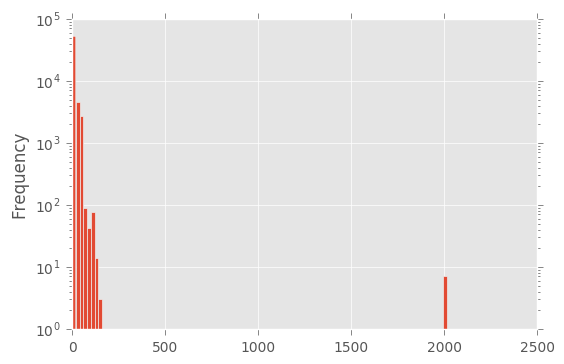

In [44]:
df.age.plot(kind='hist', logy=True, bins=100)

In [45]:
import scipy.stats as ss

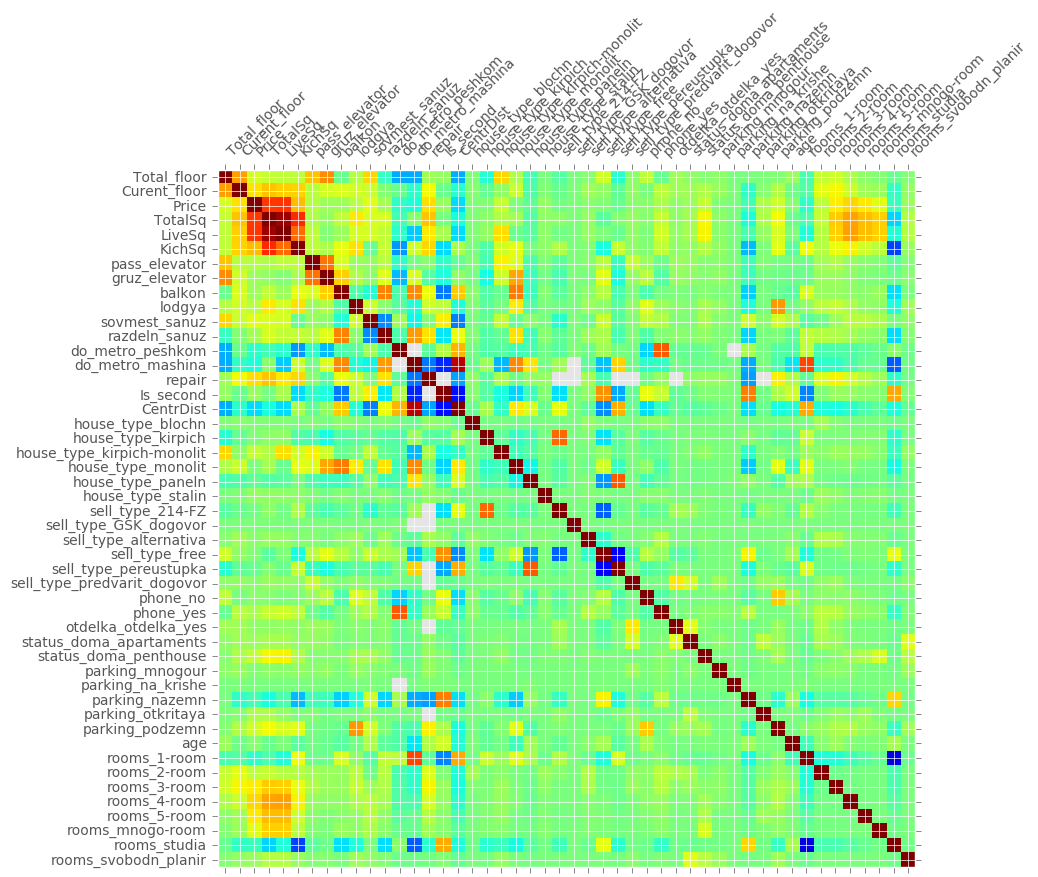

In [46]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.matshow(df.corr(), vmin=-1, vmax=1)
plt.yticks(range(df.shape[1]), df.columns)
plt.xticks(range(df.shape[1]), df.columns, rotation=45, ha="left" )
plt.show()

Нужно что-нибудь сделать с Na-шками. Они мешают оцениванию моделей. Один из вариантов - выбросить все наблюдения с Na. Надо объединить между собой колонки до метро пешком и до метро на машине. Это поможет избавиться от часть Na. 

In [47]:
df.isnull().sum()

Total_floor                        0
Curent_floor                       0
Price                              0
TotalSq                            0
LiveSq                          9294
KichSq                         20615
pass_elevator                      0
gruz_elevator                      0
balkon                             0
lodgya                             0
sovmest_sanuz                      0
razdeln_sanuz                      0
do_metro_peshkom               42349
do_metro_mashina               33077
repair                         19836
Is_second                          0
CentrDist                          0
house_type_blochn                  0
house_type_kirpich                 0
house_type_kirpich-monolit         0
house_type_monolit                 0
house_type_paneln                  0
house_type_stalin                  0
sell_type_214-FZ                   0
sell_type_GSK_dogovor              0
sell_type_alternativa              0
sell_type_free                     0
s

In [48]:
# Если наличие какого-то ремонта не указано, будем считать, что его и не было...
df['repair'].fillna(0,inplace = True)

In [49]:
# По аналогии поступим с временем до метро. Это у нас будет что-то вроде дамми...
df['do_metro_peshkom'].fillna(0,inplace = True)
df['do_metro_mashina'].fillna(0,inplace = True)

# Чуть позже мы заменим обе эти колонки на хорошее качетвеное время до метро.

In [50]:
# В 20 с лишним тысячах наблюдений не указана площадь кухни. Выясним бывает ли площидь кухни и жилая 
# площадь у студий
df[df['rooms_studia'] == 1]

,Total_floor,Curent_floor,Price,TotalSq,LiveSq,KichSq,pass_elevator,gruz_elevator,balkon,lodgya,sovmest_sanuz,razdeln_sanuz,do_metro_peshkom,do_metro_mashina,repair,Is_second,CentrDist,house_type_blochn,house_type_kirpich,house_type_kirpich-monolit,house_type_monolit,house_type_paneln,house_type_stalin,sell_type_214-FZ,sell_type_GSK_dogovor,sell_type_alternativa,sell_type_free,sell_type_pereustupka,sell_type_predvarit_dogovor,phone_no,phone_yes,otdelka_otdelka_yes,status_doma_apartaments,status_doma_penthouse,parking_mnogour,parking_na_krishe,parking_nazemn,parking_otkritaya,parking_podzemn,age,rooms_1-room,rooms_2-room,rooms_3-room,rooms_4-room,rooms_5-room,rooms_mnogo-room,rooms_studia,rooms_svobodn_planir
3,3,3,14.07,15.3,NaN,NaN,0,0,0,0,0.0,0.0,0.0,15.0,1.0,1,29.48,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0,0,0,0,0,0,1,0
4,3,3,14.18,29.0,26.0,NaN,0,0,0,0,1.0,0.0,0.0,25.0,0.0,1,22.44,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,1,0
5,21,2,14.28,13.0,10.0,3.0,1,1,0,0,1.0,0.0,0.0,0.0,0.0,1,29.10,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,0,0,0,0,1,0
7,9,1,14.40,12.0,7.0,3.0,0,0,0,0,1.0,0.0,16.0,0.0,1.0,1,16.35,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,45.0,0,0,0,0,0,0,1,0
13,14,1,14.45,15.0,12.0,3.0,1,1,0,0,1.0,0.0,0.0,0.0,0.0,1,18.46,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,15.0,0,0,0,0,0,0,1,0
20,3,1,14.50,19.3,13.0,4.0,0,0,0,0,1.0,0.0,0.0,20.0,0.0,1,22.48,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,1,0
21,3,2,14.55,26.0,22.0,NaN,0,0,0,0,0.0,0.0,0.0,15.0,0.0,1,29.03,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,3.0,0,0,0,0,0,0,1,0
22,12,1,14.55,17.5,NaN,NaN,1,1,0,0,0.0,0.0,9.0,0.0,0.0,1,23.62,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,15.0,0,0,0,0,0,0,1,0
23,10,1,14.60,15.0,12.0,3.0,1,1,0,0,1.0,0.0,14.0,0.0,1.0,1,25.83,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,19.0,0,0,0,0,0,0,1,0
32,4,4,14.65,32.0,20.0,5.0,1,0,1,0,0.0,0.0,0.0,15.0,0.0,0,28.81,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,1,0


In [ ]:
# Бывает и более чем! Окей, в таком случае у нас есть два пути. Путь первый: избавиться от 9000 наблюдений.
# Путь второй: чем-то заполнить NA. Если мы выбросим наблюдения, мы потеряем кучу другой полезной информации,
# которая могла бы нам пригодиться в прогнозах. Если мы заполним эти ячейки чем бы то ни было, мы исказим
# информацию...
# 
# Логичным было бы попробовать оба варианта и посмотреть что будет происходить с прогнозами, но мне лениво
# Это будет вашим домашним заданием! Сварить фичи как-нибудь иначе и посмотреть что происходит...
#
# Построим какую-нибудь модельку и запишем инфу из неё в жилую площадь. Чтобы получить площадь кухни, вычтем из
# общей площади жилую. 

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [52]:
X = df.ix[~df.LiveSq.isnull()]
X.drop(['LiveSq','KichSq'],axis=1,inplace=True)
y = df.ix[~df.LiveSq.isnull(), 'LiveSq']

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [53]:
X.head()

,Total_floor,Curent_floor,Price,TotalSq,pass_elevator,gruz_elevator,balkon,lodgya,sovmest_sanuz,razdeln_sanuz,do_metro_peshkom,do_metro_mashina,repair,Is_second,CentrDist,house_type_blochn,house_type_kirpich,house_type_kirpich-monolit,house_type_monolit,house_type_paneln,house_type_stalin,sell_type_214-FZ,sell_type_GSK_dogovor,sell_type_alternativa,sell_type_free,sell_type_pereustupka,sell_type_predvarit_dogovor,phone_no,phone_yes,otdelka_otdelka_yes,status_doma_apartaments,status_doma_penthouse,parking_mnogour,parking_na_krishe,parking_nazemn,parking_otkritaya,parking_podzemn,age,rooms_1-room,rooms_2-room,rooms_3-room,rooms_4-room,rooms_5-room,rooms_mnogo-room,rooms_studia,rooms_svobodn_planir
0,6,2,15.70,52.4,2,1,0,0,0.0,1.0,0.0,7.0,0.0,1,12.94,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0
1,12,1,16.09,47.0,1,1,0,0,0.0,2.0,11.0,0.0,0.0,1,3.77,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,52.0,0,1,0,0,0,0,0,0
2,25,18,16.68,97.0,2,2,0,2,0.0,2.0,15.0,0.0,0.0,1,9.77,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1,0,0,0,0,0
4,3,3,14.18,29.0,0,0,0,0,1.0,0.0,0.0,25.0,0.0,1,22.44,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,1,0
5,21,2,14.28,13.0,1,1,0,0,1.0,0.0,0.0,0.0,0.0,1,29.10,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,0,0,0,0,1,0


In [54]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
# Можно посмотреть коэффициенты...
lr.coef_

array([ -2.07072796e-01,   4.54915765e-01,   3.72604056e-01,
         5.45366221e-01,   2.44963470e+00,  -1.57023575e+00,
        -2.85175559e+00,  -4.25725847e+00,  -1.16718201e-01,
         1.37805530e+00,   7.32152353e-02,   2.35666178e-02,
        -2.33114824e+00,   2.13207013e+00,   2.91749279e-02,
         8.05352885e-02,   3.34455307e+00,   1.42237308e+00,
        -1.67255901e+00,  -2.80931665e-01,  -5.52115531e+00,
         3.05304374e+00,   1.17946540e+00,   6.30924762e+00,
         8.64514800e+00,   6.09843405e+00,   4.34408333e+00,
         1.28494452e+00,   9.78316269e-01,   2.54107380e+00,
         4.51586187e+00,   1.32389611e+01,   1.32039383e-01,
        -1.19968759e+00,   5.63068010e-01,   1.02424777e+01,
         2.20001541e+00,  -4.88837758e-03,  -1.90174460e+11,
        -1.90174460e+11,  -1.90174460e+11,  -1.90174460e+11,
        -1.90174460e+11,  -1.90174460e+11,  -1.90174460e+11,
        -1.90174460e+11])

In [56]:
pd.Series(lr.coef_, index=X.columns).sort_values()

rooms_1-room                  -1.90e+11
rooms_2-room                  -1.90e+11
rooms_studia                  -1.90e+11
rooms_3-room                  -1.90e+11
rooms_4-room                  -1.90e+11
rooms_5-room                  -1.90e+11
rooms_svobodn_planir          -1.90e+11
rooms_mnogo-room              -1.90e+11
house_type_stalin             -5.52e+00
lodgya                        -4.26e+00
balkon                        -2.85e+00
repair                        -2.33e+00
house_type_monolit            -1.67e+00
gruz_elevator                 -1.57e+00
parking_na_krishe             -1.20e+00
house_type_paneln             -2.81e-01
Total_floor                   -2.07e-01
sovmest_sanuz                 -1.17e-01
age                           -4.89e-03
do_metro_mashina               2.36e-02
CentrDist                      2.92e-02
do_metro_peshkom               7.32e-02
house_type_blochn              8.05e-02
parking_mnogour                1.32e-01
Price                          3.73e-01


In [57]:
X_pred = df.ix[df.LiveSq.isnull()]
X_pred.drop(['LiveSq','KichSq'],axis=1,inplace=True)

livesq_pred = np.maximum(lr.predict(X_pred), y.median())

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [58]:
livesq_pred[:10]

array([ 18.1       ,  18.1       ,  18.1       ,  18.1       ,
        19.83999634,  18.1       ,  27.76882935,  20.55819702,
        18.27825928,  19.92367554])

In [59]:
df.ix[df.LiveSq.isnull(), 'LiveSq'] = livesq_pred

In [60]:
df.isnull().sum()

Total_floor                        0
Curent_floor                       0
Price                              0
TotalSq                            0
LiveSq                             0
KichSq                         20615
pass_elevator                      0
gruz_elevator                      0
balkon                             0
lodgya                             0
sovmest_sanuz                      0
razdeln_sanuz                      0
do_metro_peshkom                   0
do_metro_mashina                   0
repair                             0
Is_second                          0
CentrDist                          0
house_type_blochn                  0
house_type_kirpich                 0
house_type_kirpich-monolit         0
house_type_monolit                 0
house_type_paneln                  0
house_type_stalin                  0
sell_type_214-FZ                   0
sell_type_GSK_dogovor              0
sell_type_alternativa              0
sell_type_free                     0
s

In [61]:
# Остальись только кухни. Можно вычесть из общих площадей жилую и получить кухонную... 
# Вроде бы кроме жилой площади и куханной других то и нет...

X = df.ix[df.KichSq.isnull()]
new_Kichsq = X['TotalSq'] - X['LiveSq']

df.ix[df.KichSq.isnull(), 'KichSq'] = new_Kichsq

In [62]:
df.isnull().sum()

Total_floor                    0
Curent_floor                   0
Price                          0
TotalSq                        0
LiveSq                         0
KichSq                         0
pass_elevator                  0
gruz_elevator                  0
balkon                         0
lodgya                         0
sovmest_sanuz                  0
razdeln_sanuz                  0
do_metro_peshkom               0
do_metro_mashina               0
repair                         0
Is_second                      0
CentrDist                      0
house_type_blochn              0
house_type_kirpich             0
house_type_kirpich-monolit     0
house_type_monolit             0
house_type_paneln              0
house_type_stalin              0
sell_type_214-FZ               0
sell_type_GSK_dogovor          0
sell_type_alternativa          0
sell_type_free                 0
sell_type_pereustupka          0
sell_type_predvarit_dogovor    0
phone_no                       0
phone_yes 

In [63]:
df.shape

(60000, 48)

In [1]:
60000/48

1250.0

Несколько графиков с [Kagle про какую-то недвижимость.](https://www.kaggle.com/dgawlik/house-prices-eda)

/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


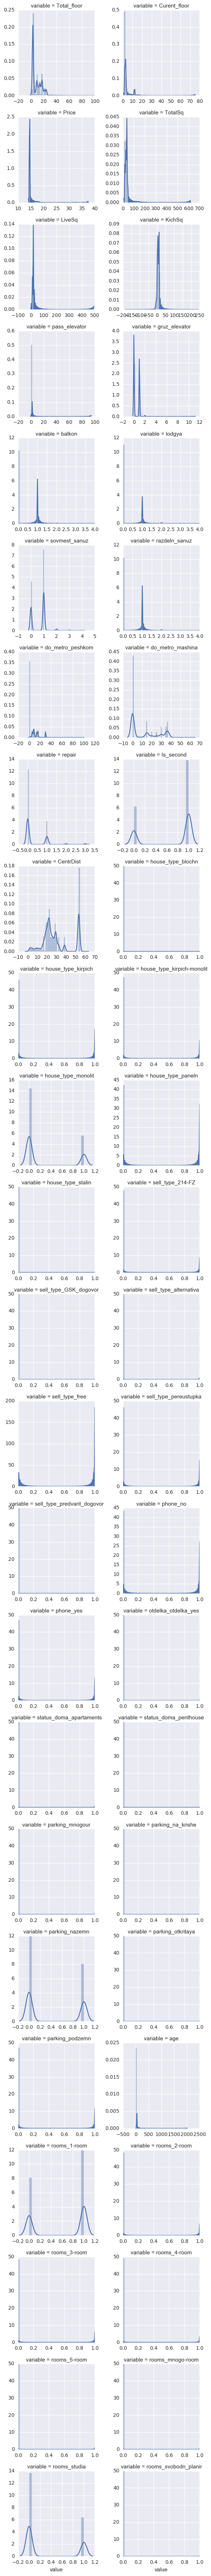

In [68]:
import seaborn as sns

f = pd.melt(df)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

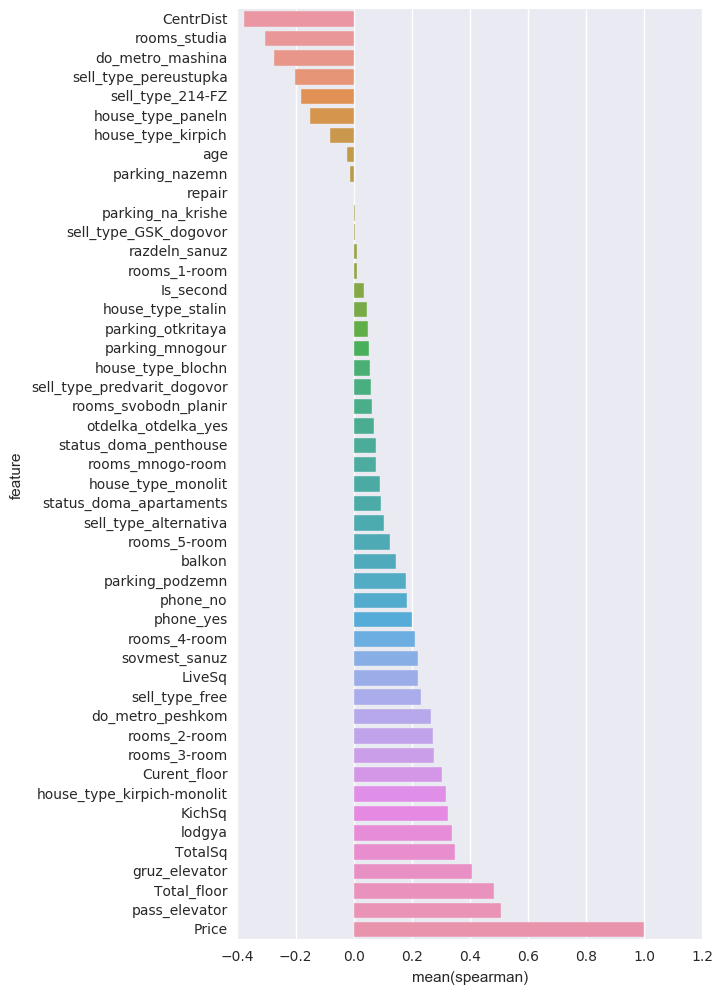

In [73]:
# Корреляция Спирмана

def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['Price'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = list(df.columns)
spearman(df, features)

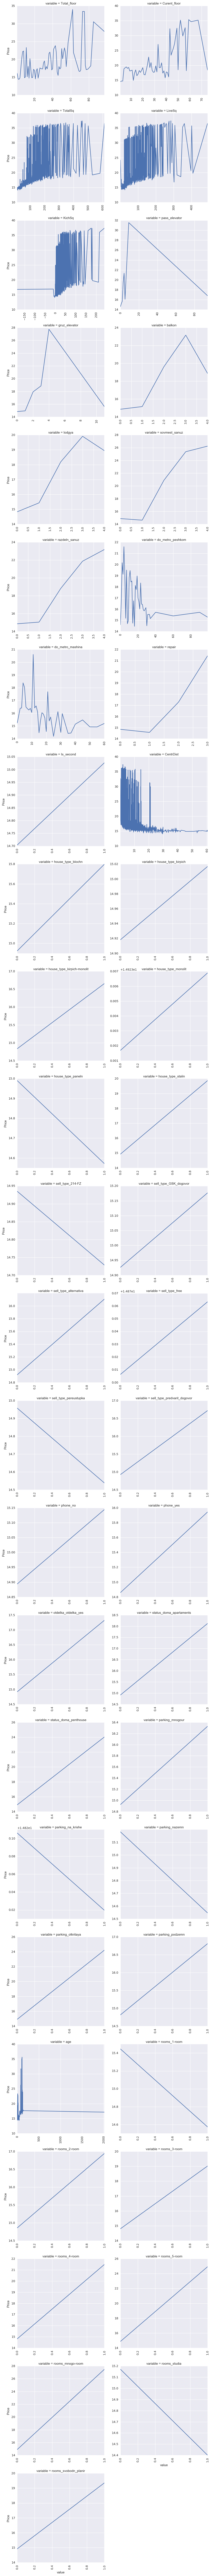

In [76]:
# Парные графики 

def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(df, id_vars=['Price'])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(pairplot, "value", "Price")

In [77]:
df.to_csv('CIAN_ready.csv')

<img src="https://raw.githubusercontent.com/FUlyankin/Parsers/master/images%20/cat_in_a_chair_580.jpg" height="500" width="500"> 

In [2]:
y = df.sort('Price').Price
x = range(len(y))

NameError: name 'df' is not defined

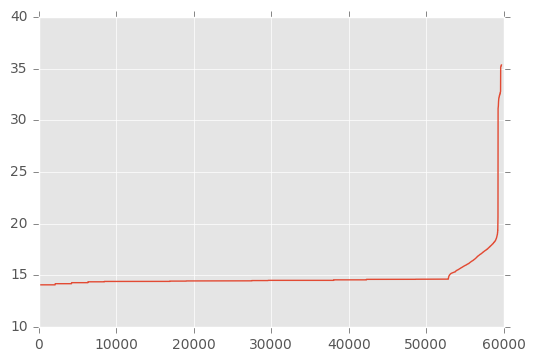

In [65]:
plot(x[:-300],y[:-300])